In [4]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

(43340, 4)


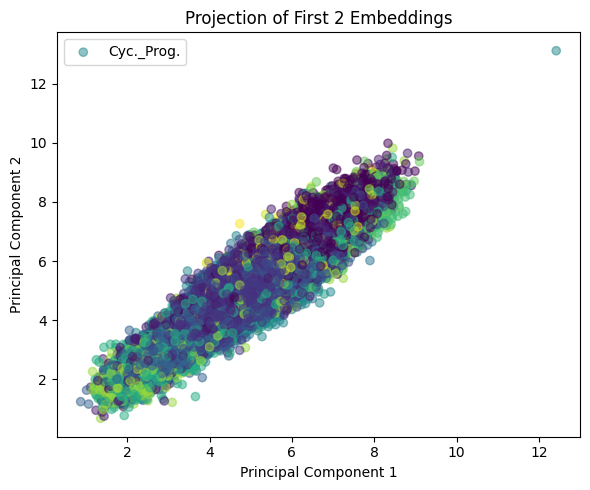

In [5]:
embedding_list = np.load('embedding_list.npy')
embeddings = np.vstack(embedding_list)
metadata = pd.read_csv('Trevino_meta.csv', index_col=0)

print(embeddings.shape)

labels = metadata['x']
unique_labels = np.unique(labels)
color_map = {label: i for i, label in enumerate(unique_labels)}
colors = labels.map(color_map)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(embeddings[:, 0], embeddings[:, 2], c = colors, alpha=0.5)
plt.title('Projection of First 2 Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(color_map)
plt.tight_layout()
plt.show()

(43340, 40)


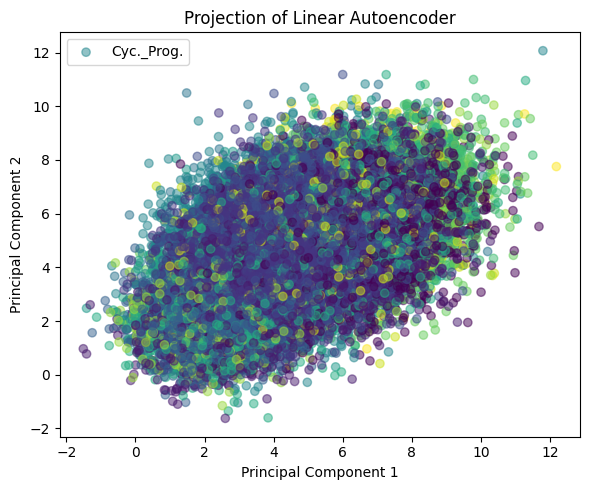

In [6]:
embedding_list = np.load('embedding_list_linear.npy')
embeddings = np.vstack(embedding_list)
metadata = pd.read_csv('Trevino_meta.csv', index_col=0)

print(embeddings.shape)

labels = metadata['x']
unique_labels = np.unique(labels)
color_map = {label: i for i, label in enumerate(unique_labels)}
colors = labels.map(color_map)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(embeddings[:, 0], embeddings[:, 2], c = colors, alpha=0.5)
plt.title('Projection of Linear Autoencoder')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(color_map)
plt.tight_layout()
plt.show()

# PCA

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import h5py
import scanpy as sc

def read_data():
    with h5py.File('Trevino.h5', 'r') as f:
        expr_data = f['human_data/block1_values'][:] # contains ['human_data']
        print("Expression data read:", expr_data.shape)

    anndata = sc.AnnData(X=expr_data) # Convert expr data to Anndata for scanpy
    print("AnnData shape:", anndata)
    with h5py.File('Trevino.h5', 'r') as f:
        cell_names = f['human_data/axis0'][1:].astype(str) # Add cell names
 
    anndata.var_names = cell_names # adding cell names along columns to Anndata

    return anndata.X # expression data as numpy array


print("Reading data...")
data = read_data()  # Assuming gene names are in the first column
print("Data shape:", data.shape)
# Transpose the data to have cells as rows and genes as columns
data = data.T  # Now rows are cells and columns are genes

data = np.log1p(data)  # Log transformation (adding 1 to avoid log(0))
data_scaled = (data - data.mean()) / data.std() 
print("Data shape after log transformation and scaling:", data_scaled.shape)

Reading data...
Expression data read: (15469, 43340)
AnnData shape: AnnData object with n_obs × n_vars = 15469 × 43340
Data shape: (15469, 43340)


In [8]:
data_scaled = data
n_components = 20
pca = PCA(n_components=n_components)
pca.fit(data_scaled)

# Transform the data to its principal components
data_pca = pca.transform(data_scaled)
print("Data shape after PCA transformation:", data_pca.shape)

Data shape after PCA transformation: (43340, 20)


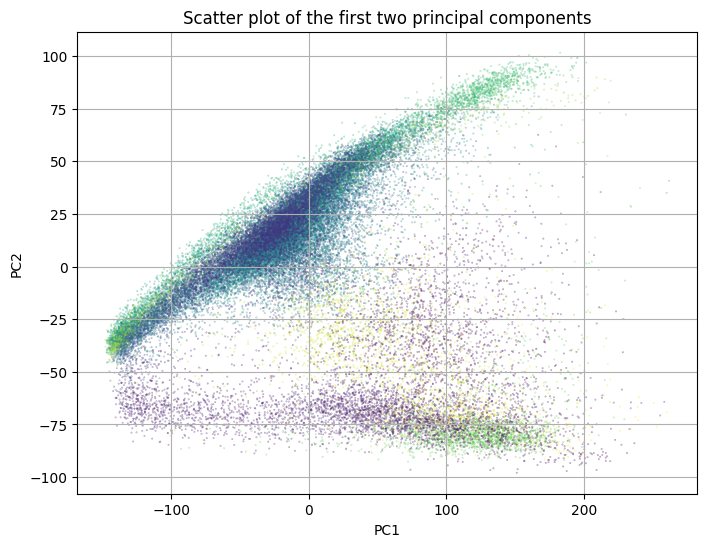

In [9]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# plt.figure(figsize=(8, 6))
# plt.plot(range(1, n_components + 1), cumulative_var_ratio, marker='o', linestyle='--')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Cumulative Explained Variance Ratio by Principal Components')
# plt.grid(True)
# plt.show()

# Select the top principal components based on explained variance
selected_components = 10  # Example: Select top 10 components

# Get the reduced dataset with selected principal components
reduced_data = data_pca[:, :selected_components]

# plot the first two principal components
plt.figure(figsize=(8, 6))
# plot with small circles
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, c=colors, s=0.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of the first two principal components')
plt.grid(True)
plt.show()

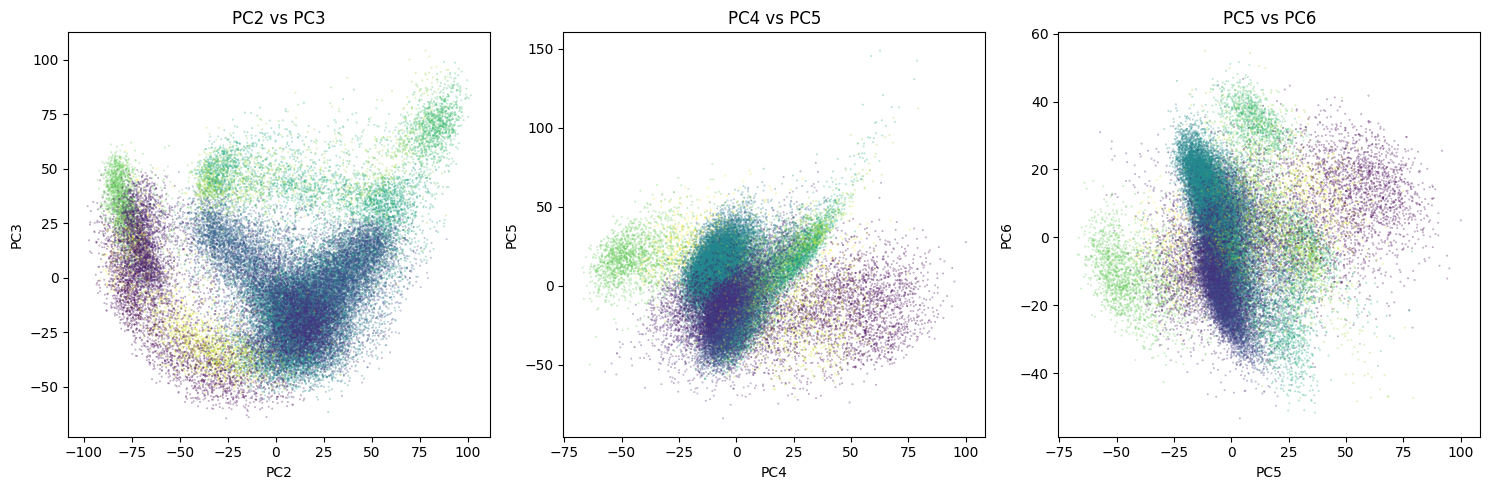

In [14]:
# plot a components 1 vs 2, 3 vs 4, and 5 vs 6 against each other
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(reduced_data[:, 1], reduced_data[:, 2], alpha=0.5, c=colors, s=0.1)
axs[0].set_xlabel('PC2')
axs[0].set_ylabel('PC3')
axs[0].set_title('PC2 vs PC3')
axs[1].scatter(reduced_data[:, 4], reduced_data[:, 3], alpha=0.5, c=colors, s=0.1)
axs[1].set_xlabel('PC4')
axs[1].set_ylabel('PC5')
axs[1].set_title('PC4 vs PC5')
axs[2].scatter(reduced_data[:, 4], reduced_data[:, 5], alpha=0.5, c=colors, s=0.1)
axs[2].set_xlabel('PC5')
axs[2].set_ylabel('PC6')
axs[2].set_title('PC5 vs PC6')
plt.tight_layout()
plt.show()